In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data=pd.merge(ride_data, city_data, how='left', on='city')

In [17]:
# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

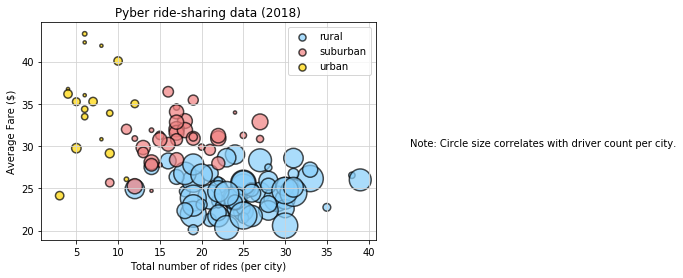

In [18]:
## Obtain the x and y coordinates for each of the three city types
#City types are urban, suburban and rural
city_data_urban= city_ride_data[city_ride_data.type=="Urban"]
city_data_rural= city_ride_data[city_ride_data.type=='Rural']
city_data_suburban=city_ride_data[city_ride_data.type=="Suburban"]

urban_counts_df = city_data_urban.groupby(["city"]).agg({"ride_id":["count"],"fare":["mean"],"driver_count":["mean"]}).reset_index()
urban_counts_df.columns = ["city" , "ride_count", "avg_fare","drivers"]

rural_counts_df=city_data_rural.groupby(["city"]).agg({"ride_id":["count"],"fare":["mean"],"driver_count":["mean"]}).reset_index()
rural_counts_df.columns = ["city" , "ride_count", "avg_fare","drivers"]

suburban_counts_df=city_data_suburban.groupby(["city"]).agg({"ride_id":["count"],"fare":["mean"],"driver_count":["mean"]}).reset_index()
suburban_counts_df.columns = ["city" , "ride_count", "avg_fare","drivers"]

#(urban_counts_df["drivers"].sum())=2405
#(rural_counts_df["drivers"].sum())=78
#(suburban_counts_df["drivers"].sum())=490


# Build the scatter plots for each city types
plt.scatter(urban_counts_df["ride_count"],urban_counts_df["avg_fare"],color='lightskyblue', edgecolor='k',
            linewidth= 1.5, marker='o',s=urban_counts_df["drivers"]*10, alpha=0.7)
plt.scatter(suburban_counts_df["ride_count"],suburban_counts_df["avg_fare"],color='lightcoral',edgecolor='k', 
            linewidth=1.5, marker='o', s=suburban_counts_df["drivers"]*10, alpha=0.7)
plt.scatter(rural_counts_df["ride_count"], rural_counts_df["avg_fare"],color='gold', edgecolor='k', 
            marker='o', linewidth=1.5, s=rural_counts_df["drivers"]*10,alpha=0.7)


# Incorporate the other graph properties
plt.title("Pyber ride-sharing data (2018)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total number of rides (per city)")
plt.grid(b=True, which='major', color='lightgray', linestyle='-')

# Create a legend
leg=plt.legend(("rural","suburban","urban"))
leg.legendHandles[0]._sizes=[50]
leg.legendHandles[1]._sizes=[50]
leg.legendHandles[2]._sizes=[50]

# Incorporate a text label regarding circle size
plt.text(45, 30,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Pyber/Pyber-bubble.png")
# Show plot
plt.show()


## Total Fares by City Type

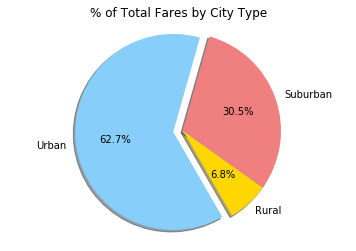

In [19]:
# Calculate Type Percents
total_fare=city_ride_data['fare'].sum()
city_fare_pie = city_ride_data.groupby(["type"])["fare"].sum()

# Build Pie Chart
colors=['gold','lightcoral','lightskyblue']   
explode=[0,0,.1]
plt.pie(city_fare_pie,labels=city_fare_pie.index, colors=colors,explode=explode, shadow=True,
        startangle= 300, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Pyber/Pyber-fares-pie.png")
plt.show()

## Total Rides by City Type

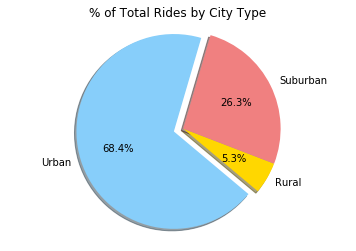

In [39]:
# Calculate Ride Percents
total_ride=city_ride_data['ride_id'].sum()
city_ride_pie = city_ride_data.groupby(["type"])["ride_id"].count()

# Build Pie Chart
colors=['gold','lightcoral','lightskyblue']
explode=(0,0,0.1)
plt.pie(city_ride_pie,labels=city_ride_pie.index, colors=colors, shadow=True, explode=explode,startangle=-40, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Pyber/Pyber-rides-pie.png")
# Show Figure
plt.show()

## Total Drivers by City Type

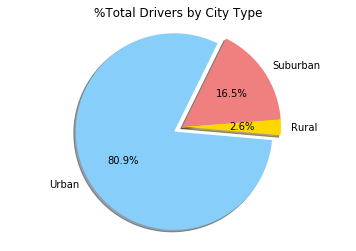

In [30]:
# Calculate Driver Percents
total_driver=city_ride_data.groupby(["type","city"])
city_driver_pie = total_driver["driver_count"].mean()
city_driver_pie = city_driver_pie.reset_index()
city_driver_pie=city_driver_pie.groupby("type").sum()

# Build Pie Charts
colors=['gold','lightcoral','lightskyblue']  
explode=[0,0,.1]
plt.pie(city_driver_pie,labels=city_driver_pie.index, colors=colors, explode=explode, 
        shadow= True, startangle= -5,autopct = "%1.1f%%")
plt.title("%Total Drivers by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("../Pyber/Pyber-drivers-pie.png")
# Show Figure
plt.show()